In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [20]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df = df.head(500)

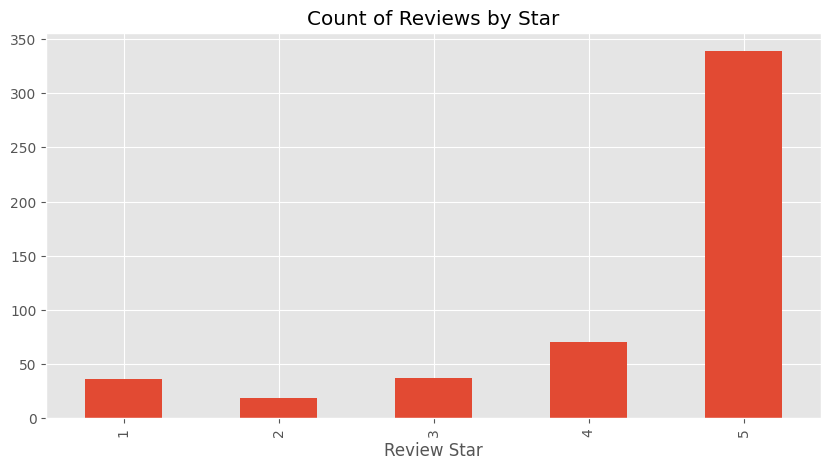

In [7]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar' ,title='Count of Reviews by Star', figsize=(10,5))
ax.set_xlabel('Review Star')
plt.show()

In [8]:
example = df['Text'][30]
print(example)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)


In [13]:
token = nltk.word_tokenize(example)
print(token)

['I', 'have', 'never', 'been', 'a', 'huge', 'coffee', 'fan', '.', 'However', ',', 'my', 'mother', 'purchased', 'this', 'little', 'machine', 'and', 'talked', 'me', 'into', 'trying', 'the', 'Latte', 'Macciato', '.', 'No', 'Coffee', 'Shop', 'has', 'a', 'better', 'one', 'and', 'I', 'like', 'most', 'of', 'the', 'other', 'products', ',', 'too', '(', 'as', 'a', 'usually', 'non-coffee', 'drinker', '!', ')', '.', '<', 'br', '/', '>', 'The', 'little', 'Dolche', 'Guesto', 'Machine', 'is', 'super', 'easy', 'to', 'use', 'and', 'prepares', 'a', 'really', 'good', 'Coffee/Latte/Cappuccino/etc', 'in', 'less', 'than', 'a', 'minute', '(', 'if', 'water', 'is', 'heated', 'up', ')', '.', 'I', 'would', 'recommend', 'the', 'Dolce', 'Gusto', 'to', 'anyone', '.', 'Too', 'good', 'for', 'the', 'price', 'and', "I'am", 'getting', 'one', 'myself', '!', ':', ')']


In [18]:
tagged = nltk.pos_tag(token)

In [22]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  I/PRP
  have/VBP
  never/RB
  been/VBN
  a/DT
  huge/JJ
  coffee/NN
  fan/NN
  ./.
  However/RB
  ,/,
  my/PRP$
  mother/NN
  purchased/VBD
  this/DT
  little/JJ
  machine/NN
  and/CC
  talked/VBD
  me/PRP
  into/IN
  trying/VBG
  the/DT
  (ORGANIZATION Latte/NNP Macciato/NNP)
  ./.
  (PERSON No/NNP Coffee/NNP Shop/NNP)
  has/VBZ
  a/DT
  better/JJR
  one/CD
  and/CC
  I/PRP
  like/VBP
  most/JJS
  of/IN
  the/DT
  other/JJ
  products/NNS
  ,/,
  too/RB
  (/(
  as/IN
  a/DT
  usually/RB
  non-coffee/JJ
  drinker/NN
  !/.
  )/)
  ./.
  </JJ
  br/NN
  //NNP
  >/VBZ
  The/DT
  little/JJ
  (PERSON Dolche/NNP Guesto/NNP Machine/NNP)
  is/VBZ
  super/JJ
  easy/JJ
  to/TO
  use/VB
  and/CC
  prepares/VBZ
  a/DT
  really/RB
  good/JJ
  Coffee/Latte/Cappuccino/etc/NNP
  in/IN
  less/JJR
  than/IN
  a/DT
  minute/NN
  (/(
  if/IN
  water/NN
  is/VBZ
  heated/VBN
  up/RP
  )/)
  ./.
  I/PRP
  would/MD
  recommend/VB
  the/DT
  (ORGANIZATION Dolce/NNP Gusto/NNP)
  to/TO
  anyone/NN
  ./.
  To

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...


True

In [25]:
#VADER Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [26]:
sia.polarity_scores('I am so bored')

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.3384}

In [29]:
#Run the Polarity score in entire dataset
from tqdm import tqdm

res = {}

for i , row in tqdm(df.iterrows() , total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)








100%|██████████| 500/500 [00:00<00:00, 683.21it/s]


In [34]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='left', left_on='id', right_on='Id')

In [35]:
vaders

,id,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


TypeError: 'Text' object is not callable

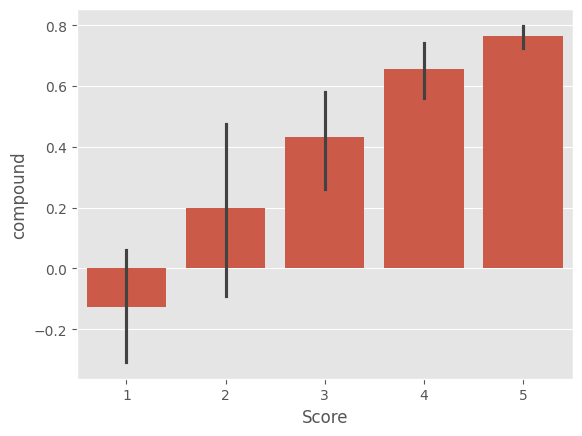

In [36]:
ax = sns.barplot(data=vaders,x='Score',y='compound')
ax.title('Compound Score by Amazon Reviews')
plt.show()

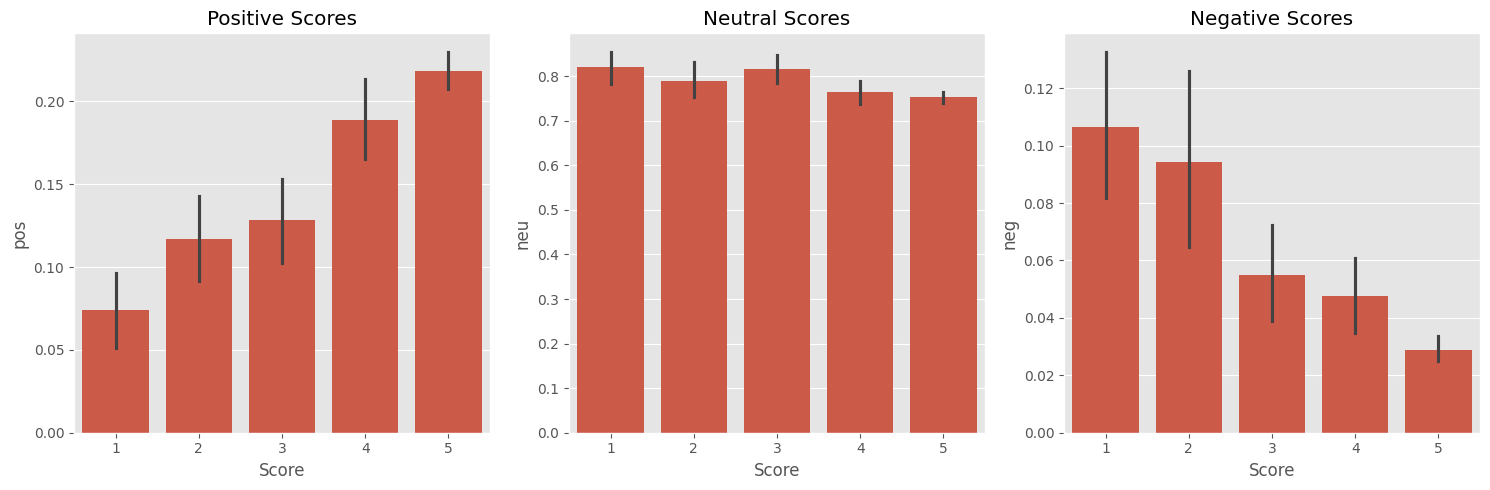

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting with Seaborn
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
axs[0].set_title('Positive Scores')

sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
axs[1].set_title('Neutral Scores')

sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[2].set_title('Negative Scores')

# Show the plot
plt.tight_layout()
plt.show()


In [45]:
#Roberta Pretrained Model
import torch
print(torch.__version__)
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

2.4.1+cpu


In [51]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\KHUSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


In [52]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)


RuntimeError: Failed to import transformers.models.roberta.modeling_tf_roberta because of the following error (look up to see its traceback):
Failed to import transformers.generation.tf_utils because of the following error (look up to see its traceback):
cannot import name 'add_model_info_to_custom_pipelines' from 'transformers.utils' (c:\Users\KHUSHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\__init__.py)